In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from scipy.stats import gaussian_kde
import seaborn as sns
import math
from tqdm import tqdm

from IPython.display import clear_output
from scipy import stats

In [2]:
# def plot_hitmap(x,y,time,path="",title=""):
        
#     plt.rc('font',size=14)
#     plt.figure(figsize=(7,6))
#     plt.set_cmap('jet')  
    
    
#     # x=[math.log(x) for x in np.array(x)]
#     # y=[math.log(x) for x in np.array(y)] 
    
#     x=np.array(x)
#     y=np.array(y)    
#     xy = np.vstack([x,y])
#     z = gaussian_kde(xy)(xy)
#     r=np.corrcoef(x,y)
    
#     # Create the main plot
#     _, ax1 = plt.subplots()


#     cb=ax1.scatter(x, y, c=z, s=10,alpha=0.8)  
#     ax1.plot(x,x,ls='-.',c='k',linewidth=1,alpha=0.5,label=f"n={len(list(x))}\nr={int(1000*r[0][1])/1000}")      
#     cbar = plt.colorbar(cb)
#     ax1.set_ylabel("k (Single time point)")
#     ax1.set_xlabel("k (Time course data)")    
#     ax1.legend()  
#     # Remove top and right spines
#     ax1.spines['top'].set_visible(False)
#     ax1.spines['right'].set_visible(False)
#     ax1.set_xlim([0,min(max(x),0.3)])
#     ax1.set_ylim([0,min(max(y),0.3)])
    
    
#     # Create the second x-axis
#     ax2 = ax1.twiny()
#     ax2.set_xlim(ax1.get_xlim())
#     ax2.set_xticks([(i*time) for i in ax1.get_xticks()])
#     ax2.set_xlabel('kt', color='k')
#     ax2.spines['right'].set_visible(False)


#     # Adjust layout to prevent labels from overlapping
#     plt.tight_layout()
#     if len(path)>0:
#         plt.savefig(f"{path}/{title}.jpeg",dpi=900)
        
#     plt.show()

In [3]:
def plot_hitmap(x,y):   
    
    plt.set_cmap('turbo')    
    x=np.array(x)
    y=np.array(y)    
    xy = np.vstack([x,y])
    z = gaussian_kde(xy)(xy)
    r=np.corrcoef(x,y)
    
    plt.scatter(x, y, c=z, s=10,alpha=0.8)
    
    

In [4]:
def plotRateRDDensity(rd_k,path="",title=""):
    plt.rc('font',size=14)
    plt.figure(figsize=(8,6))
    # rd_k= (res.d2ome_k - res.new_k)/res.d2ome_k
    ax=sns.histplot(rd_k, kde=True, #bins=50,
                label=f"n={len(rd_k)},μ = {int(100*np.mean(rd_k))/100}, \nmedian = {int(100*np.median(rd_k))/100}, \nsd = {int(100*np.std(rd_k))/100}",
                color='white',alpha=0.1,edgecolor=('black',0.75) )
    ax.lines[0].set_color('k')
    ax.lines[0].set_alpha(0.75) 
    ax.lines[0].set_ls(':') 
    
    plt.gca().spines['top'].set_visible(False)
    plt.gca().spines['right'].set_visible(False)
    plt.xlabel(r'$\frac{ k _{\:Time\: course\: data} - k _{\:Single\: time\: point}}{k _{\:Time\: course\: data}}$')
    plt.legend()
    plt.tight_layout()
    if len(path)>0:
        plt.savefig(f"{path}/{title}_RD_k.jpeg",dpi=900)
    plt.show()

In [5]:
def getpath(organ,_time,_rsquared,_numberofterms):
    path= f"../Figures_3/{organ}/Day_{_time}/r2_{_rsquared}/" 
    title=f"{organ}_day_{_time}_fsr.csv"   
    return path+title

In [6]:
pw,ph=0.046,1.5574E-4
organ="Liver"
# organ='heart'
time=1
rsquared=0.9

data=pd.read_csv(getpath(organ,time,rsquared,1))

In [7]:
plt.rc('font',size=12)
plt.figure(figsize=(10,6)) 
def plotRateRDDensity(rd_k,col,title=""):
    
    ax=sns.histplot(rd_k, kde=True, #bins=50,
                label=f"{title} n={len(rd_k)}, mode= {int(1000*stats.mode(rd_k)[0])/1000},\nμ = {int(1000*np.mean(rd_k))/1000}, median = {int(1000*np.median(rd_k))/1000}, sd = {int(1000*np.std(rd_k))/1000}",
                color=col,alpha=0.1,edgecolor=(col,0.75) )
    # ax.lines[0].set_color('k')
    ax.lines[0].set_alpha(0.75) 
    # ax.lines[0].set_ls(':') 
    
    plt.gca().spines['top'].set_visible(False)
    plt.gca().spines['right'].set_visible(False)
    plt.xlabel("Relative difference ( "+  r'$\frac{ I_{0}(t)^{exp} }{I_{0}(0)^{theo} - I_{0}^{asmyp} }$' +" , " + r'$\frac{  I_{0}(t)^{exp} }{I_{0}(0)^{theo}  - I_{0}^{asmyp}}$'+ " )")
    plt.legend(bbox_to_anchor=(1.55, 1), loc='upper right', borderaxespad=0, frameon=False)
    plt.tight_layout()
    # plt.xlim([-0.4,0.4])

<Figure size 1000x600 with 0 Axes>

In [8]:
def getplot(data,ratetype,path,title):
    plt.rc('font',size=14)
    plt.figure(figsize=(14,8))

    rd=None
    if ratetype =='fsr':  rd=(data.d2ome_k - data.k_sol)/data.d2ome_k
    if ratetype =='1term':  rd=(data.d2ome_k - data.new_k_1)/data.d2ome_k
    if ratetype =='10term':  rd=(data.d2ome_k - data.new_k_10)/data.d2ome_k
    
    plt.subplot(1,2,1)
    val=(data.I0_0_exp - data.i0_t_exp)
    plot_hitmap(  rd,val)
    plt.xlabel(r'$\frac{ k _{\:Time\: course\: data} - k _{\:Single\: time\: point}}{k _{\:Time\: course\: data}}$')
    plt.ylabel(r'$ I_{0}(0)^{exp} - I_{0}(t)^{exp} $' )    
    plt.vlines(x=0,ymin=min(val),ymax=max(val),colors='k',ls=':')
        
        
    plt.subplot(1,2,2)
    val=(data.I0_0_exp - data.i0_t_exp)/(data.M0 - data.I0_asmp)
    plot_hitmap( rd,val )
    plt.xlabel(r'$\frac{ k _{\:Time\: course\: data} - k _{\:Single\: time\: point}}{k _{\:Time\: course\: data}}$')
    plt.ylabel(r'$\frac{ I_{0}(0)^{exp} - I_{0}(t)^{exp} }{I_{0}(0)^{theo} - I_{0}^{asmyp} }$' )
    plt.vlines(x=0,ymin=min(val),ymax=max(val),colors='k',ls=':')
    
    
    if len(path)>0:
        plt.savefig(f"{path}/{title}.jpeg",dpi=900)
    plt.show()

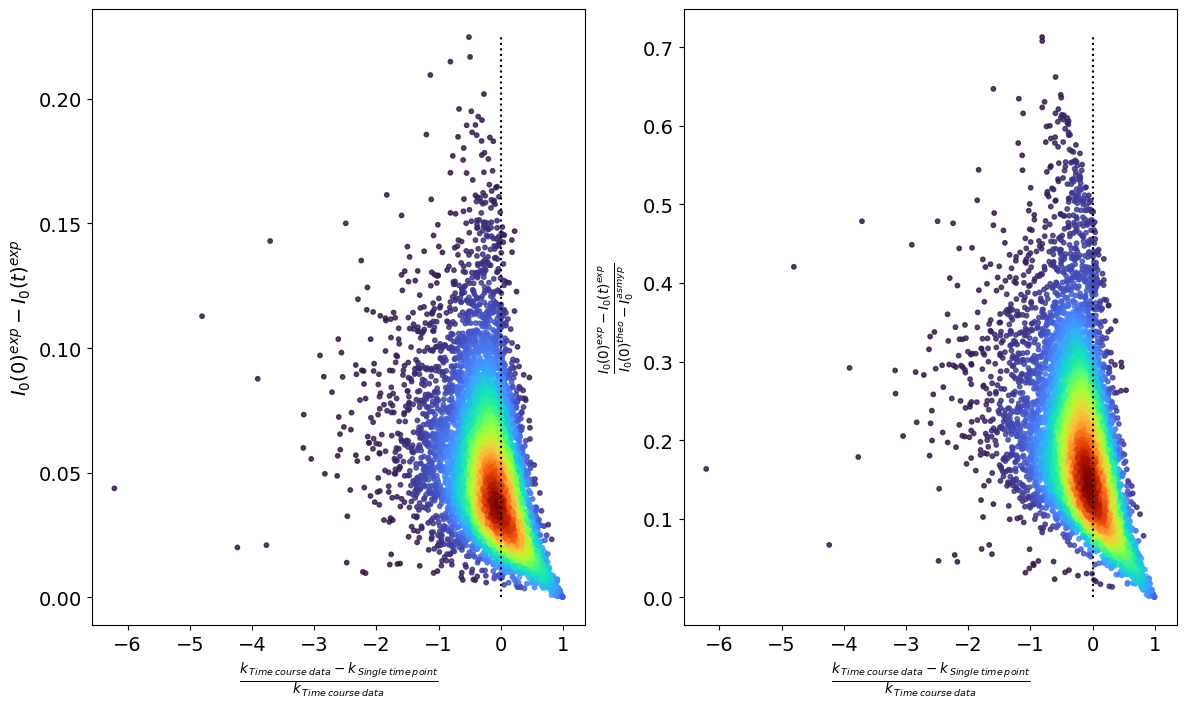

In [9]:
getplot(data,'fsr','','')

In [10]:
import os

for _time in tqdm([1 ,2 ,3 ,6 ,7,13,16]):
# for _time in tqdm([6 ,7,16]):    
    # for _rsquared in [0.95,0.9][::-1]:
        _rsquared=0.9
        for organ in ['muscle','heart','kidney','liver']:
            try:                
                data=pd.read_csv(getpath(organ,_time,rsquared,1))


                #============================ FSR ===============================
                #============================ === ===============================            
                
                _path1=f"Figures/{organ}/Day_{_time}/"
                if not os.path.exists(_path1): os.makedirs(_path1)

                _title=f"K_RD_{organ}_day_{_time}_fsr"    
                getplot(data,'fsr',_path1,_title)

                clear_output(wait=True)  
                #============================ 1-TERM ============================
                #============================ === ===============================    

                _path1=f"Figures/{organ}/Day_{_time}/"
                if not os.path.exists(_path1): os.makedirs(_path1)

                _title=f"K_RD_{organ}_day_{_time}_numberofterms_{1}"  
                getplot(data,'1term',_path1,_title)

                clear_output(wait=True)  
                #============================ 10-TERM ===========================
                #============================ === ===============================   

                _path1=f"Figures/{organ}/Day_{_time}/"
                if not os.path.exists(_path1): os.makedirs(_path1)

                _title=f"K_RD_{organ}_day_{_time}_numberofterms_{10}"    

                getplot(data,'10term',_path1,_title)
                clear_output(wait=True)  

 
            except Exception as ex:
                print(ex)
                continue


100%|██████████| 7/7 [05:23<00:00, 46.27s/it]


In [11]:
# rsquared=0.9
# for organ in ['liver','muscle','heart','kidney']:
#     print(organ)
#     plt.figure(figsize=(15,10))
#     plt.rc('font',size=9)
#     for index,_time in tqdm(enumerate([1 ,2 ,3 ,6 ,7,13])):
        
#         plt.subplot(2,3,index+1)
#         data=pd.read_csv(getpath(organ,_time,rsquared,1))

#         plt.title(f"time = {_time}")
#         plotRateRDDensity((  data.I0_0_exp/(data.M0-data.I0_asmp) ),'k',"t=0, ")
#         plotRateRDDensity((  data.i0_t_exp/(data.M0-data.I0_asmp) ),'r',f"t={time}, ")
        
#     plt.tight_layout()
#     # plt.savefig(f"Figures/_{organ}_i0_dif.jpeg",dpi=900);
#     plt.show()
    